In [1]:
# Credit Card Fraud Detection
# Performing CNN on the Credit Card Dataset, in order to determine if the transactions are fraud or not.
# Library Used: TensorFlow, Sklearn, Keras

In [2]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv1D, MaxPool1D
from keras.layers import Flatten, Dense, Dropout, BatchNormalization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [3]:
# Import the dataset
data=pd.read_csv('C:/Users/User/Desktop/archive4.zip')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#To determine the Data types of the features
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
# Check the shape of the dataset
data.shape
# There are 31 columns here, and the final column contains the Class target variable.

(284807, 31)

In [6]:
# To get all the details
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# To determine if there is any null values present in the dataset
data.isnull().sum()
#Can be seen that there is no null value in the dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#To get all the information about all the features
data.info()
#Can be determine by looking at the dataset and the information that our target column has values consisting 0 and 1.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Determine the number of values in the "class" that have values of 0 or 1 that are present.
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
# There are 284315 transactions 
# 492 transactions are fraud only.
# Now, balancing the dataset.

In [11]:
# Separating fraud and non-fraud rows
nonFraudData = data[data['Class']==0]
fraudData = data[data['Class']==1]

nonFraudData.shape, fraudData.shape

((284315, 31), (492, 31))

In [12]:
# Selecting the 492 non-fraud entries from the dataframe 
nonFraudDataSample = nonFraudData.sample(fraudData.shape[0])

nonFraudDataSample.shape

(492, 31)

In [13]:
# Now there is balanced dataset: rows 492 fraud , 492 non-fraud
balancedData = fraudData.append(nonFraudDataSample,ignore_index = True) 
balancedData

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,64075.0,1.111020,-0.072666,0.925315,1.562056,-0.586746,0.268497,-0.401192,0.189653,0.922774,...,-0.086708,0.099533,-0.070265,0.087981,0.600571,-0.256842,0.070230,0.022468,11.99,0
980,72240.0,1.219754,0.368057,0.324857,1.442379,-0.334085,-1.048428,0.312373,-0.249684,0.049149,...,-0.015934,0.112052,-0.103748,0.737076,0.792607,-0.280876,0.009116,0.016671,2.00,0
981,82482.0,-5.944376,4.617413,-2.001718,-1.982703,-2.653444,-0.874220,-1.981014,3.021313,1.713123,...,-0.174660,-0.470570,0.513265,-0.062049,0.359824,0.805723,0.853437,0.621119,3.69,0
982,99167.0,-2.380567,1.831206,-1.186275,-0.349462,-0.228867,-1.230816,-0.184015,0.889110,1.389572,...,-0.479449,-0.730975,0.593091,-0.217680,-0.167484,0.137827,0.093724,-0.028206,8.99,0


In [14]:
# Now the data has been balanced and combined.
# Check again the value counts
balancedData['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [15]:
# now dividing the dataframe into dependent and independent varaible
x=balancedData.drop(['Class'], axis=1)
y=balancedData.Class

# check the shape
x.shape, y.shape

((984, 30), (984,))

In [16]:
# Splitting in to Train and test dataset
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 42)

# Check the shape again
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(738, 30) (246, 30) (738,) (246,)


In [17]:
# Scaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [18]:
# Converting 2D dataset into 3D For CNN prediction
# xtrain = xtrain.to_numpy()
# xtest = xtest.to_numpy()

In [19]:
xtrain = xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
xtest = xtest.reshape(xtest.shape[0],xtest.shape[1],1)

# Cheking the shape
xtrain.shape, xtest.shape

((738, 30, 1), (246, 30, 1))

In [20]:
# ytrain, ytest are in series, converting the same into a numpy array
ytrain=ytrain.to_numpy()
ytest=ytest.to_numpy()

In [21]:
#Building the Model: Convolutional Neural Network

In [22]:
# Importing model
model = Sequential()

# layers:

# 1) First
# The model starts with adding a 1D convolutional layer with 32 filters,
# kernel size of 2, a ReLU activation function, and input shape of the xtrain data.
# It then applies batch normalization which normalize the activations of the previous layer at each batch.
# The code then applies dropout with a rate of 0.2 to prevent overfitting.
model.add(Conv1D(32, kernel_size=2, activation = 'relu',input_shape = xtrain[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

In [23]:
# 2) Second
# The code then adds another 1D convolutional layer with 64 filters,
# kernel size of 2, a ReLU activation function, and applies batch normalization and dropout 
# with a rate of 0.5 again to prevent overfitting.
model.add(Conv1D(64, kernel_size=2, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5)) 

In [24]:
# 3) building Artificial neural network (ANN)
# Then the code flattens the output of the previous layer and add a dense layer with 64 units 
# and ReLU activation function, followed by dropout with a rate of 0.5 to prevent overfitting.
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

In [25]:
# 4) Last
# The code adds the last dense layer with 1 unit and a sigmoid activation function.
# This layer is used as the output layer, and the activation function (sigmoid) is used for binary classification problems.
model.add(Dense(1,activation='sigmoid'))

In [26]:
#It shows the layers of the model, the number of parameters in each layer, 
#the shape of the output of each layer, and the total number of parameters in the model.
#This is useful for understanding the structure of the model and for debugging.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [27]:
# compiling the model
# We can change the lr during the training process.
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [28]:
#It trains the model on the training data (X_train and y_train), for 20 epochs and also passing 
#the test data (X_test and y_test) as validation_data to evaluate performance after each epoch.
model.fit(xtrain,ytrain, epochs=60, validation_data=(xtest,ytest))

Epoch 1/60
24/24 [==============================] - 1s 17ms/step - loss: 0.4449 - accuracy: 0.8550 - val_loss: 0.5415 - val_accuracy: 0.6626
Epoch 2/60
24/24 [==============================] - 0s 5ms/step - loss: 0.2326 - accuracy: 0.9133 - val_loss: 0.5225 - val_accuracy: 0.5163
Epoch 3/60
24/24 [==============================] - 0s 5ms/step - loss: 0.2150 - accuracy: 0.9201 - val_loss: 0.5946 - val_accuracy: 0.5122
Epoch 4/60
24/24 [==============================] - 0s 6ms/step - loss: 0.1766 - accuracy: 0.9363 - val_loss: 0.5605 - val_accuracy: 0.5122
Epoch 5/60
24/24 [==============================] - 0s 7ms/step - loss: 0.1741 - accuracy: 0.9363 - val_loss: 0.4831 - val_accuracy: 0.5488
Epoch 6/60
24/24 [==============================] - 0s 6ms/step - loss: 0.1874 - accuracy: 0.9268 - val_loss: 0.5496 - val_accuracy: 0.5244
Epoch 7/60
24/24 [==============================] - 0s 7ms/step - loss: 0.1538 - accuracy: 0.9417 - val_loss: 0.5731 - val_accuracy: 0.5122
Epoch 8/60
24/24 [=

In [30]:
# Making the Prediction on a test set of data (xtest) and Evaluating the model
yPrediction = model.predict(xtest)
yPrediction = (yPrediction>0.5)#Converts the predicted probability values into binary values by using a threshold of 0.5.

8/8 [==============================] - 0s 2ms/step


In [31]:
from sklearn.metrics import roc_auc_score

# Get the predicted probability values for the positive class (class 1)
yPredictionProb = model.predict(xtest)[:,0]
# Calculate the ROC AUC score
rocAUC = roc_auc_score(ytest, yPredictionProb)
print("ROC AUC: {:.3f}".format(rocAUC))

8/8 [==============================] - 0s 3ms/step
ROC AUC: 0.981


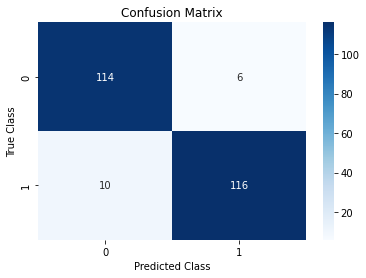

In [33]:
# evaluating the accuracy score and confusion matrix
# Checking the accuracy
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the confusion matrix
confMatrix = confusion_matrix(ytest, yPrediction)
sns.heatmap(confMatrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

In [34]:
from sklearn.metrics import precision_recall_fscore_support as score

In [35]:
precision, recall, fscore, support = score(ytest, yPrediction)
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('Fscore: {}'.format(fscore))
print('Support: {}'.format(support))

Precision: [0.91935484 0.95081967]
Recall: [0.95       0.92063492]
Fscore: [0.93442623 0.93548387]
Support: [120 126]
